<a href="https://colab.research.google.com/github/YYYggdrasil/Machine-Learning/blob/main/midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import SymLogNorm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder
)
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy import stats
import statsmodels.api as sm

## Training Data

In [29]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


## Test File

In [30]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

DATA PREPROCESSING

In [31]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [32]:
traindata.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


train

In [33]:
X = traindata.drop(columns=['id', 'FloodProbability'])
y = traindata['FloodProbability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


tokenization

In [34]:
for col in ['Urbanization', 'Deforestation', 'Rainfall', 'Temperature', 'MonsoonIntensity']:
    if col in traindata.columns:
        print(f"{col}:", traindata[col].unique())
    else:
        print(f" Column '{col}' not found in traindata.")

Urbanization: [ 6  8  3  4  2  5 10  7  9 11  1  0 12 13 16 14 15 17]
Deforestation: [ 8  4  7  5  6  2  3  9  0 10  1 13 11 12 14 15 16 17]
 Column 'Rainfall' not found in traindata.
 Column 'Temperature' not found in traindata.
MonsoonIntensity: [ 5  6  3  8  4  7  9  2 10  1  0 11 12 13 15 14 16]


In [35]:
# Peek at the first few rows
testdata[['MonsoonIntensity']].head()

,MonsoonIntensity
0,4
1,4
2,1
3,2
4,6


In [36]:
traindata.isnull().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


In [37]:

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print("model training complete")

model training complete


# This heatmap shows the correlation between all the numerical features in your training data, including 'FloodProbability'.

In [38]:

y_train_pred = model.predict(x_train)

r2 = r2_score(y_train, y_train_pred)
print("R² Score:", r2)

R² Score: 0.8449678970612999


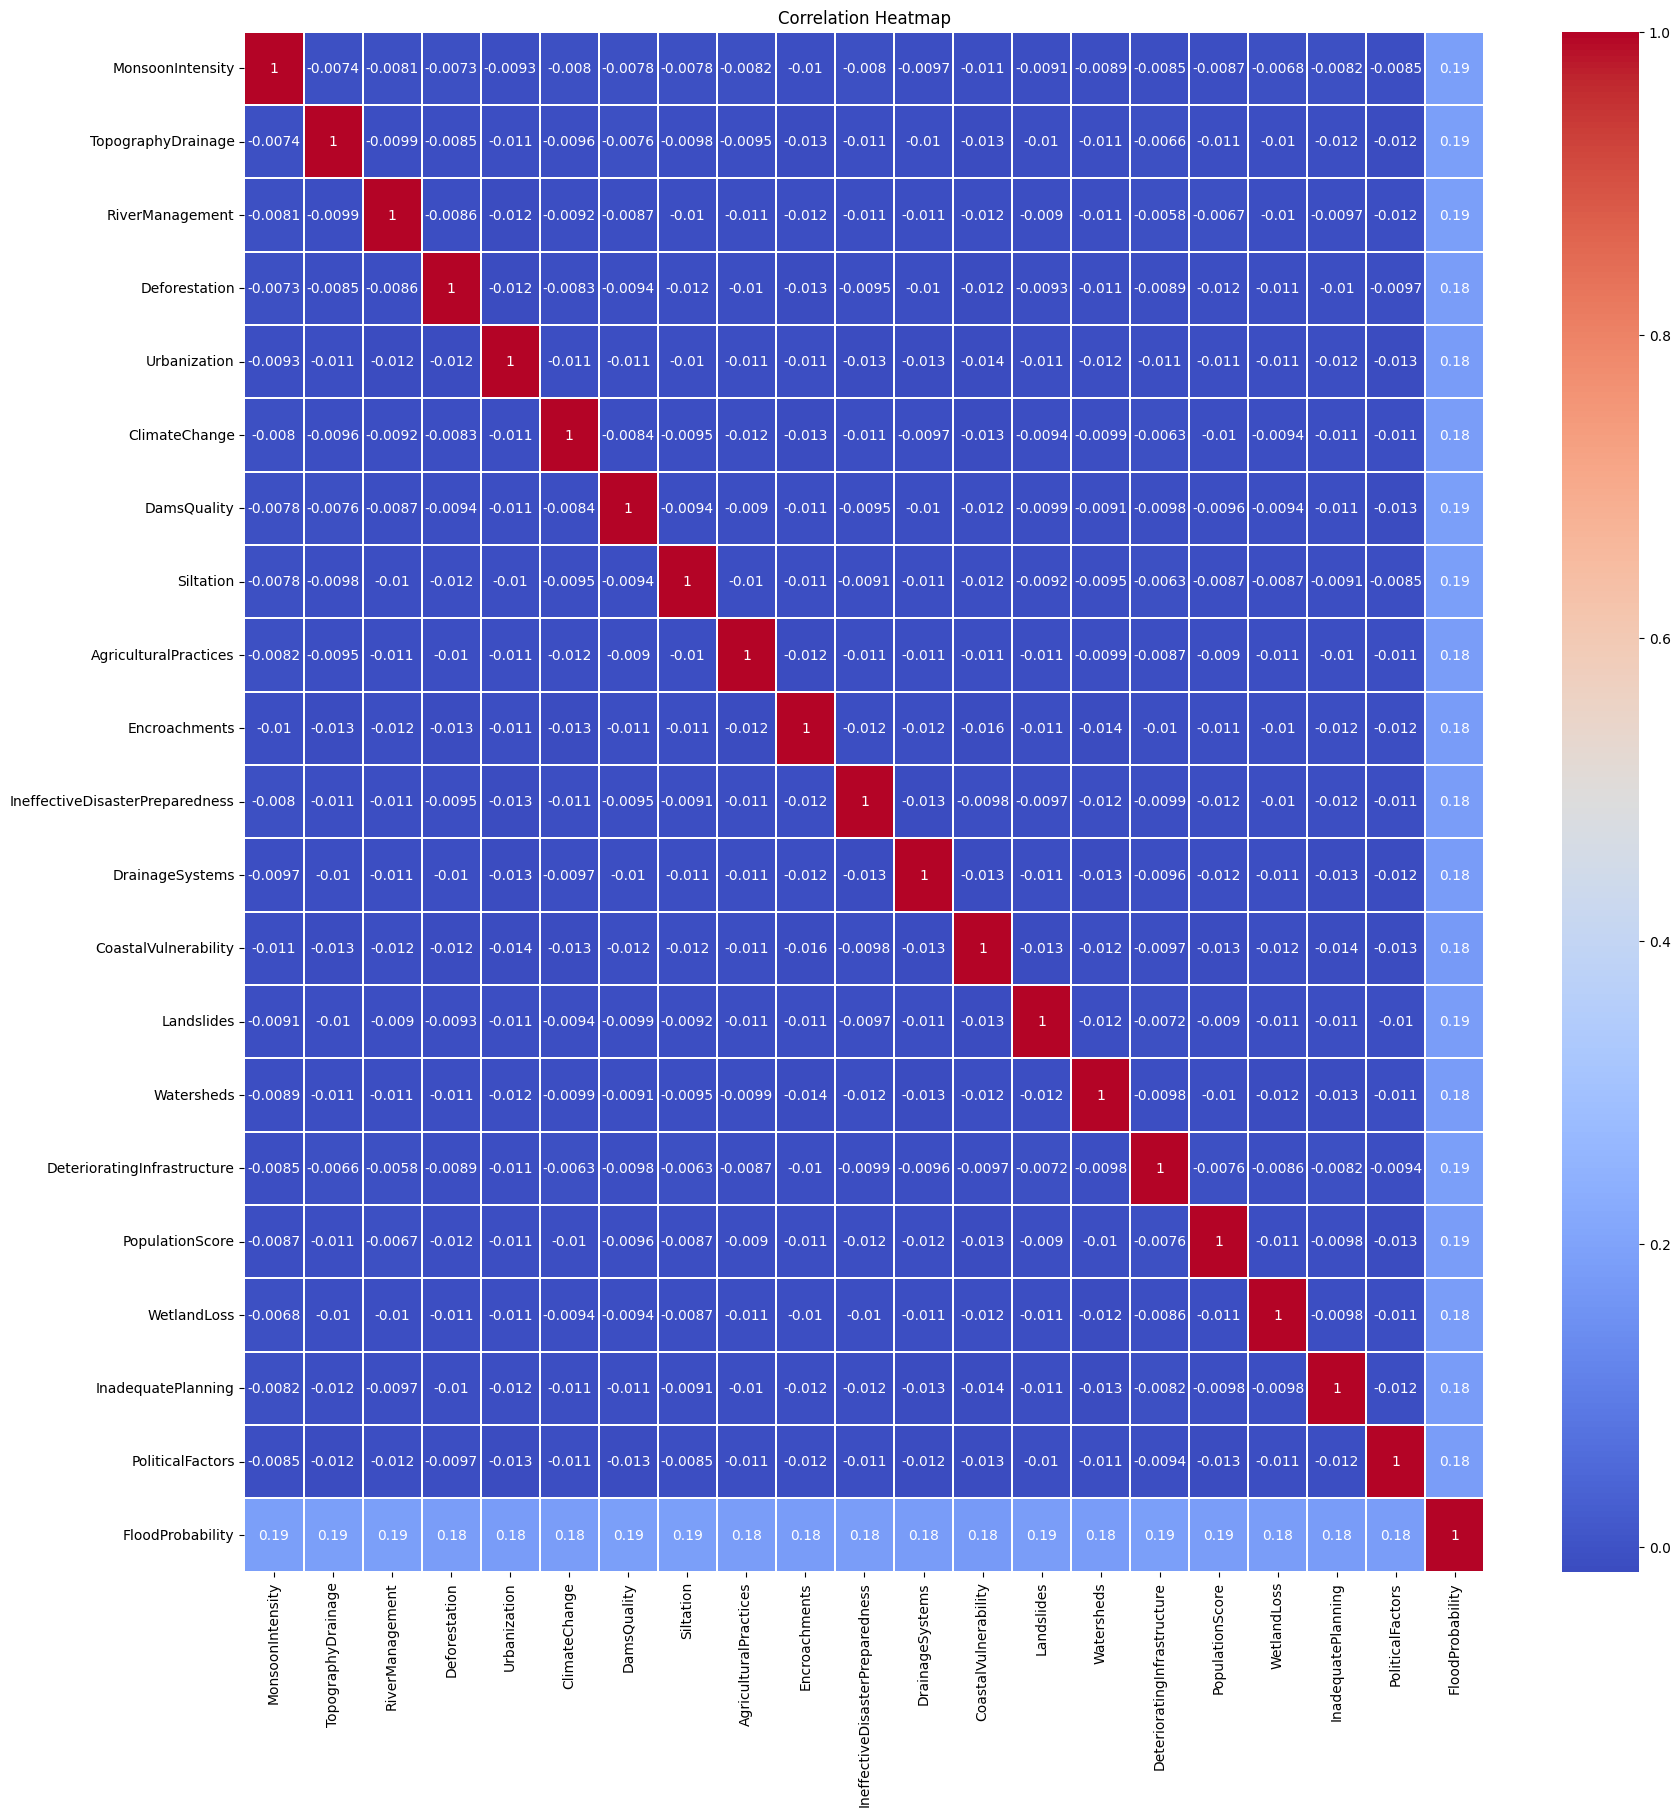

In [39]:
plt.figure(figsize=(20,20))
corr = traindata.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()


# New Section These three scatter plots show the relationship between 'FloodProbability' and three individual features: 'MonsoonIntensity', 'Urbanization', and 'Deforestation'.

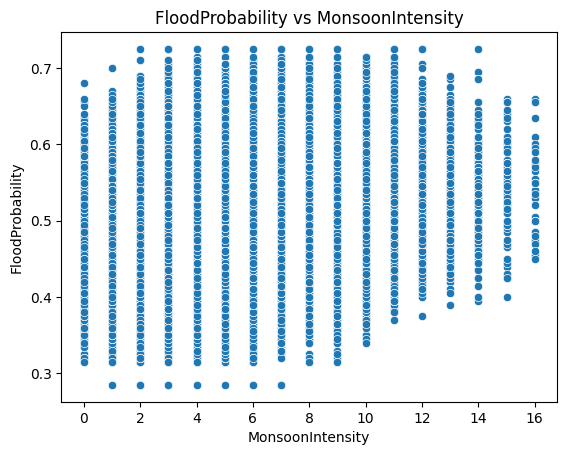

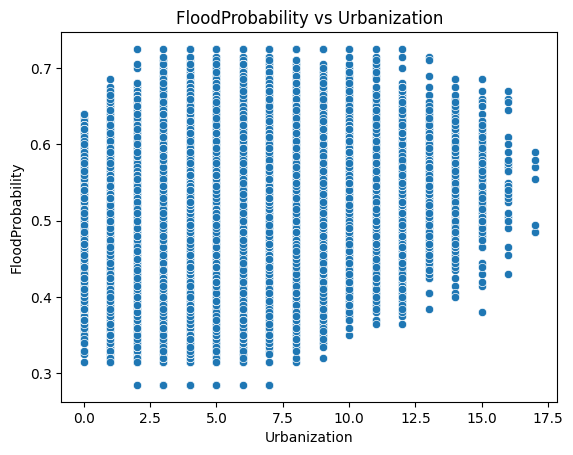

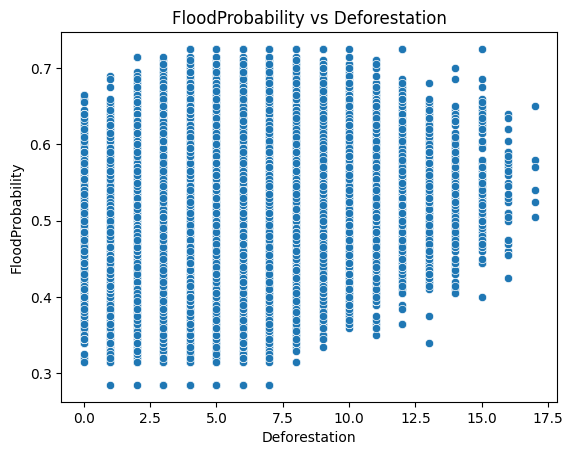

In [40]:
sns.scatterplot(x='MonsoonIntensity', y='FloodProbability', data=traindata)
plt.title('FloodProbability vs MonsoonIntensity')
plt.show()

# Urbanization vs FloodProbability
sns.scatterplot(x='Urbanization', y='FloodProbability', data=traindata)
plt.title('FloodProbability vs Urbanization')
plt.show()

# Deforestation vs FloodProbability
sns.scatterplot(x='Deforestation', y='FloodProbability', data=traindata)
plt.title('FloodProbability vs Deforestation')
plt.show()

In [41]:
model = LinearRegression()
model.fit(X_scaled, y)

y_train_pred = model.predict(X_scaled)

-------------

# scatter plot compares the actual 'FloodProbability' values from your training data against the values predicted by your Linear Regression model.

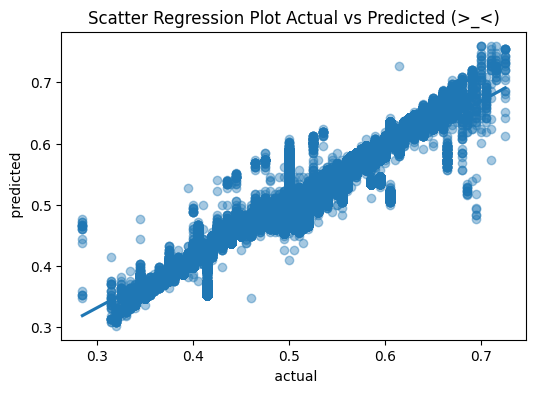

In [43]:

plt.figure(figsize=(6, 4))
sns.regplot(x=y, y=y_train_pred, scatter_kws={'alpha': 0.4})
plt.title('Scatter Regression Plot Actual vs Predicted (>_<)')
plt.xlabel(' actual')
plt.ylabel(' predicted')
plt.show()

R2

/tmp/ipython-input-3746771832.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=(0, 0, 1, 0.95))


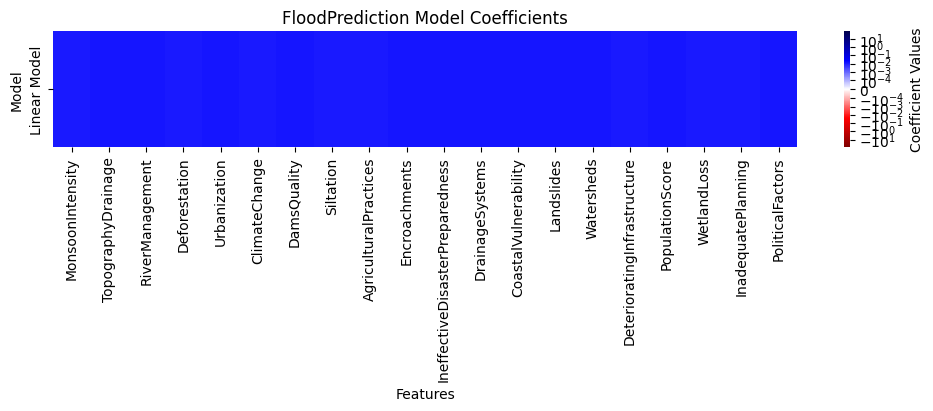

In [47]:

 sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
 testdata= pd.read_csv(sample_submission_url)


 expected_cols = model.feature_names_in_
 testdata_aligned = testdata.reindex(columns=expected_cols, fill_value=0)

y_pred = model.predict(testdata_aligned)

 submission_df = pd.DataFrame({
     'id': samplefile['id'],
     'FloodProbability': y_pred
 })

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

X_test = testdata.drop(columns=['id'])

X_test_scaled = scaler.transform(X_test)

try:
    y_pred = model.predict(X_test_scaled)
except NameError:
    print("Error: The 'model' variable is not defined. Please train the model first.")
submission_df = pd.DataFrame({
    'id': testdata['id'],  # Get IDs from the test data
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created successfully: submission_file.csv")

Submission file created successfully: submission_file.csv
